In [1]:
from grapeAutoDiff import grapeAutoDiff
from qutip import qeye, sigmax, sigmay, fock, tensor
import jax.numpy as np

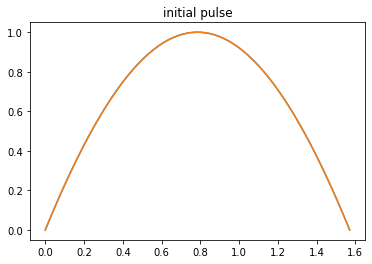

old shapes: p0 (2, 100)		 H0 (2, 2)	 Hcs (2, 2, 2)		 psi0 (2, 2)
new shapes: p0 (2, 100, 1, 1)	 H0 (2, 2)	 Hcs (2, 1, 2, 2)	 psi0 (2, 2)
3e-01[1e-05] 6e-02[1e-05] 2e-03[2e-05] -4e-07[2e-05] 0e+00[2e-05] -7e-07[2e-05] 

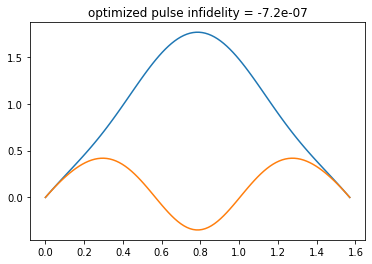

In [2]:
I = qeye(2); sx = sigmax(); sy = sigmay()

H0 = I*0; Hcs = [sx, sy]
T = np.pi/2; nT = 100
psi0 = I; psig = sx

p = grapeAutoDiff(H0, Hcs, T, nT, psi0, psig)

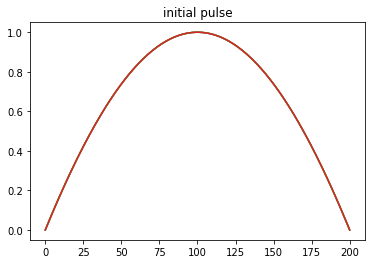

old shapes: p0 (4, 200)		 H0 (30, 30)	 Hcs (4, 30, 30)		 psi0 (30, 1)
new shapes: p0 (4, 200, 1, 1)	 H0 (30, 30)	 Hcs (4, 1, 30, 30)	 psi0 (30, 1)
8e-01[1e-05] 4e-01[2e-04] 2e-01[2e-04] 9e-02[8e-04] 3e-02[7e-04] 6e-03[6e-04] 2e-03[6e-04] 1e-03[6e-04] 5e-04[6e-04] 

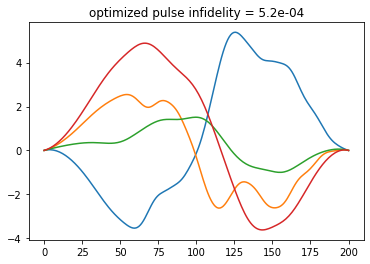

In [3]:
from Hqc import Hqc, cat

NQ = 2; NC = 15
v1 = tensor(fock(NQ, 0), fock(NC, 0))
v2 = tensor(fock(NQ, 0), cat(NC, 1.2))

H0, Hcs = Hqc(NQ, NC, drive=1e-3, chi=3e-3, kerrQ=0.4, kerrC=1e-5)
T = 200; nT = 200
psi0 = [v1]; psig = [v2]

p = grapeAutoDiff(H0, Hcs, T, nT, psi0, psig)